# <a href="https://thetahat.ru/">Машинное обучение на ФБМФ</a>

# Логистическая регрессия

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set_theme(style='dark', font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')

## Анемия и лабораторные тесты

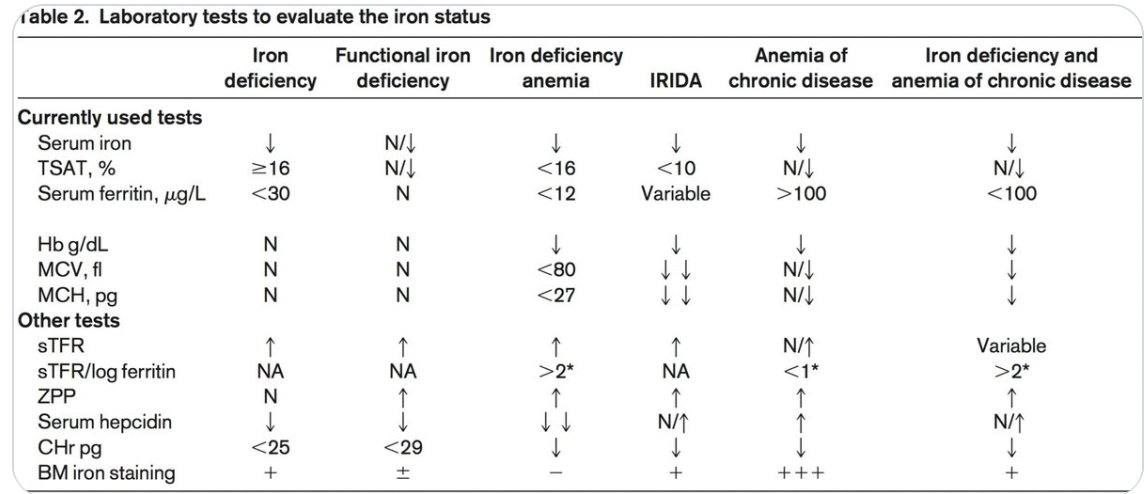  

Анемия — это состояние, при котором уровень гемоглобина в крови ниже нормы. Гемоглобин — это белок в эритроцитах, который переносит кислород из лёгких в ткани и органы. Анемия может быть вызвана различными причинами, включая дефицит железа, хронические заболевания, кровопотери или нарушения синтеза гемоглобина.

На изображении представлены лабораторные тесты, которые используются для оценки состояния железа и диагностики анемии. Вот краткое объяснение ключевых показателей:

### Ключевые показатели:

- **Serum iron (Сывороточное железо)**:
  - Низкий уровень указывает на дефицит железа.
  - Нормальные значения: Мужчины: 60–170 мкг/дл, Женщины: 50–170 мкг/дл.

- **TSAT (Transferrin Saturation, %)**:
  - Показывает, насколько насыщен трансферрин железом.
  - Низкий уровень (<16%) указывает на дефицит железа.

- **Serum ferritin (Сывороточный ферритин)**:
  - Показывает запасы железа в организме.
  - Низкий уровень (<30 мкг/л) указывает на дефицит железа.

### Примеры использования в таблице:

| Показатель                  | Описание                                                                 |
|-----------------------------|--------------------------------------------------------------------------|
| **Сывороточное железо (Serum iron)** | ↓ — снижено при железодефиците и железодефицитной анемии.              |
|                             | N↓↓ — может быть нормальным или значительно сниженным при функциональном дефиците железа. |
| **Ферритин (Serum ferritin)**       | <30 — снижен при железодефиците.                                        |
|                             | >100 — повышен при анемии хронических заболеваний.                    |
| **Гемоглобин (Hb)**         | ↓ — снижен при анемии.                                                  |
|                             | N — нормальный уровень, если анемия отсутствует.                        |
| **MCV (Mean Corpuscular Volume)**   | <80 — снижен (микроцитоз) при железодефицитной анемии.                 |
|                             | N — нормальный при отсутствии анемии.                                   |  


Подробнее с типами и их особенностями можно ознакомиться [тут](https://ashpublications.org/hematology/article/2015/1/8/20735/Iron-deficiency-new-insights-into-diagnosis-and)


<!DOCTYPE html>
<body>
    <h1>Описание датасета</h1>
    <p><p>
    <p>1. <strong>Hemoglobin</strong>: это белок в красных кровяных тельцах (эритроцитах), который отвечает за перенос кислорода из лёгких в ткани и органы, а также за возврат углекислого газа обратно в лёгкие.</p>
    <p>Нормальные значения:</p>
    <ul>
        <li>Мужчины: 13.8&mdash;17.2 г/дл</li>
        <li>Женщины: 12.1&mdash;15.1 г/дл</li>
    </ul>
    <p>2. <strong>MCH (Mean Corpuscular Hemoglobin)</strong>: показывает среднее количество гемоглобина в одном эритроците.</p>
    <p>3. <strong>MCHC (Mean Corpuscular Hemoglobin Concentration)</strong>: показывает среднюю концентрацию гемоглобина в единице объёма эритроцитов.</p>
    <p>4. <strong>MCV (Mean Corpuscular Volume)</strong>: показывает средний объём одного эритроцита.</p>
    <p>5. <strong>GENDER (Пол)</strong>: указывает пол пациента (мужской или женский). В данном датасете пол уже закодирован как 0 и 1.</p>
    <p>6. <strong>IDENTIFICATION (Идентификация)</strong>: уникальный идентификатор пациента, который указывает на наличие/отсутствие заболевания.</p>
    <p>Как можно заметить наши данные используются в классификации и выявлении различных типов анемии из реальной жизни.</p>
</body>
</html>


## 1. Загрузка датасета

Cкачаем [датасет](https://www.kaggle.com/datasets/medelbachirkhellaf/anemia-easylevel) о предсказании наличия анемии у пациента.

Мы будем работать только с файлом `Test_Anemia.csv`.  

<details>
  <summary>Если загрузили .zip файл в среду</summary>
  Воспользуйтесь приведенной ниже командой, она достанет нужный файл в среду `/content/`

  !unzip `/content/archive.zip`
</details>

In [75]:
data = pd.read_csv("Test_Anemia.csv")

Посмотрим на вид датасета и на типы данных, содержащихся в нем

In [78]:
data.head()

,Hemoglobin,MCH,MCHC,MCV,GENDER,IDENTIFICATION
0,14.9,22.7,29.1,83.7,1,0
1,15.9,25.4,28.3,72.0,0,0
2,9.0,21.5,29.6,71.2,0,1
3,14.9,16.0,31.4,87.5,0,0
4,14.7,22.0,28.2,99.5,1,0


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hemoglobin      1421 non-null   float64
 1   MCH             1421 non-null   float64
 2   MCHC            1421 non-null   float64
 3   MCV             1421 non-null   float64
 4   GENDER          1421 non-null   int64  
 5   IDENTIFICATION  1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [82]:
data.describe()

,Hemoglobin,MCH,MCHC,MCV,GENDER,IDENTIFICATION
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,13.412738,22.905630,30.251232,85.523786,0.520760,0.436312
std,1.974546,3.969375,1.400898,9.636701,0.499745,0.496102
min,6.600000,16.000000,27.800000,69.400000,0.000000,0.000000
25%,11.700000,19.400000,29.000000,77.300000,0.000000,0.000000
50%,13.200000,22.700000,30.400000,85.300000,1.000000,0.000000
75%,15.000000,26.200000,31.400000,94.200000,1.000000,1.000000
max,16.900000,30.000000,32.500000,101.600000,1.000000,1.000000


## 2. Предобработка данных

В этом предобработанном датасете отсутвуют пропуски, как видно из информации `data.info()`, если бы были пропуски, значения Non-Null Count в таблице выше не были бы равны для всех столбцов в `data` и, непосредственно,  размеру датасета. Однако, на будущее, важно проверять данные на пропуски, это можно сделать с помощью следующего метода

In [86]:
data.isna().sum()

Hemoglobin        0
MCH               0
MCHC              0
MCV               0
GENDER            0
IDENTIFICATION    0
dtype: int64

Чтобы удобнее было работать с данными переведем все названия признаков в нижний регистр  

<details>
  <summary>Подсказка</summary>
  Можно воспользоваться методом `.lower()`
</details>

In [89]:
data.columns = data.columns.str.lower()
data

,hemoglobin,mch,mchc,mcv,gender,identification
0,14.9,22.7,29.1,83.7,1,0
1,15.9,25.4,28.3,72.0,0,0
2,9.0,21.5,29.6,71.2,0,1
3,14.9,16.0,31.4,87.5,0,0
4,14.7,22.0,28.2,99.5,1,0
...,...,...,...,...,...,...
1416,10.6,25.4,28.2,82.9,0,1
1417,12.1,28.3,30.4,86.9,1,1
1418,13.1,17.7,28.1,80.7,1,1
1419,14.3,16.2,29.5,95.2,0,0


Разбейте наши данные на `features` $(X)$ &mdash; данные для обучения, и `target` $(Y)$ &mdash;предсказываемая переменная

In [92]:
X = data[['hemoglobin',	'mch',	'mchc',	'mcv',	'gender']]
y = data['identification']

## 3. Графики

Проведем визуальный анализ данных. Построим оценки плотности по каждому признаку отдельно для каждого класса.  
1. Какие признаки лучше всего разделяют классы?  
2. Как это отразится на результатах модели?
3. Что можно сказать о распределении для признака GENDER?

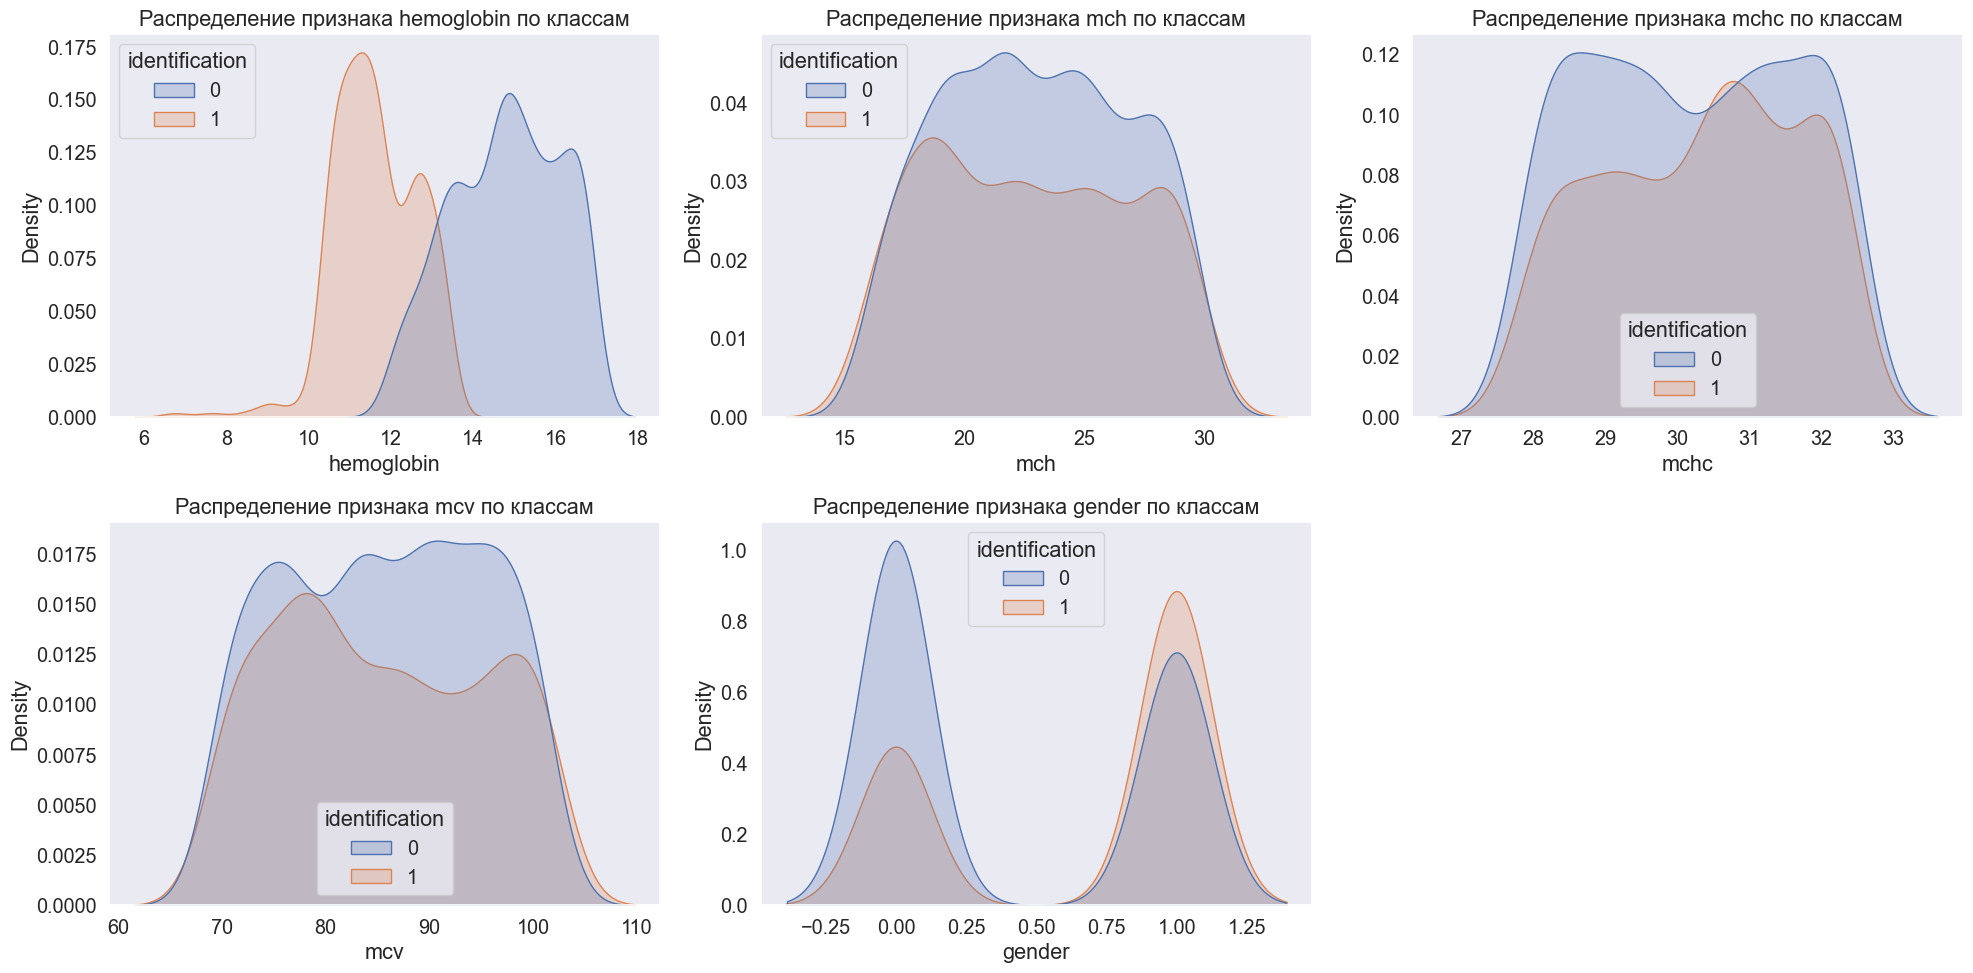

In [96]:
# Определим количество признаков
num_features = len(X.columns)

# Определим количество строк и столбцов для subplot
num_cols = 3  # Количество столбцов
num_rows = (num_features + num_cols - 1) // num_cols  # Количество строк

# Создаем фигуру и сетку подграфиков
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Плоский список осей для удобства итерации
axes = axes.flatten()

# Построение графиков плотности для каждого признака
for i, feature in enumerate(X.columns):
    sns.kdeplot(data=data, x=feature, hue="identification", fill=True, ax=axes[i])
    axes[i].set_title(f'Распределение признака {feature} по классам')

# Удаляем лишние оси, если их больше, чем признаков
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Показываем графики
plt.tight_layout()
plt.show()



**Ответ:**

Видим, что лучшее разделение идёт по гемоглобину, область перекрытия маленькая, а для случая заболевания видим пониженное содержание. Тогда вклад этого признака в построение регрессии будет наибольшим. В разделении по полу видно, что женщины болеют (1) чаще, однако разделять группы по данному признаку не удобно, так как пики накладываются.

Поскольку для признака gender распределение выглядит не очень информативно, визуализируем его с помощью `barplot`

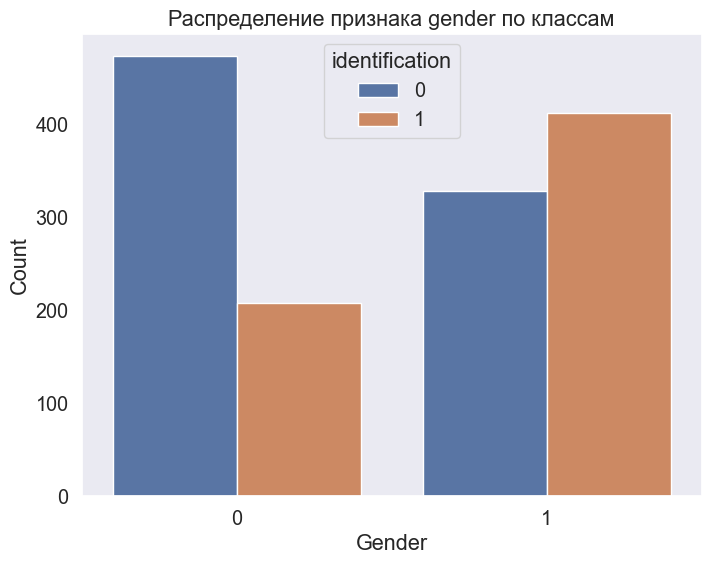

In [100]:
# Визуализация распределения признака 'gender' с помощью barplot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender', hue='identification')

# Добавляем заголовок и метки осей
plt.title('Распределение признака gender по классам')
plt.xlabel('Gender')
plt.ylabel('Count')

# Показываем график
plt.show()

Более наглядно видим, что мужчины (0) болеют реже, а женщины (1) чаще

## 4. Разделим датасет и обучим модель

Создайте и обучите логистическую регрессию. Укажите `fit_intercept` &mdash; `True` и `penalty` &mdash; `None`.

In [187]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [189]:
model = LogisticRegression(penalty = None, fit_intercept = True, max_iter = 2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, penalty=None)

Напечатайте коэффициенты модели. О чём говорят знаки `+` и `-`?

In [192]:
coefficients = model.coef_
intercept = model.intercept_

feature_names = X.columns  # Замените на ваши названия признаков
coef_df = pd.DataFrame(coefficients.T, index=feature_names, columns=['weights'])

# Добавляем свободный член в DataFrame
coef_df.loc['intercept'] = intercept

print(coef_df)

                weights
hemoglobin  -155.692901
mch            0.428652
mchc           0.811413
mcv            0.081808
gender       233.450668
intercept   1820.058222


**Выводы:**

Значение по модулю означает вклад признака в модель. А знак обозначает прямую и обратную зависимость (чем меньше значение гемоглобина, тем сильнее отклоняется в положительную сторону таргет). Видим, что наиболее сильно влияют признаки hemoglobin и gender

## 5. Проверим качество модели

Для  объектов из тестовой выборки оцените вероятность наличия анемии, при помощи метода [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Выведите эти значения, а также итоговые предсказания модели методом `predict`

In [197]:
y_pred = model.predict(X_test)
probabilities = model.predict_proba(X_test)
# Выводим вероятности и предсказания
results_df = pd.DataFrame({
    'Object': range(1, len(X_test) + 1),
    'Probability_Class_0': [i[0] for i in probabilities],
    'Probability_Class_1': [i[1] for i in probabilities],
    'Prediction': y_pred 
})

# Выводим DataFrame
results_df.head()

,Object,Probability_Class_0,Probability_Class_1,Prediction
0,1,0.000000,1.000000e+00,1
1,2,1.000000,2.144664e-192,0
2,3,0.993267,6.732703e-03,0
3,4,1.000000,3.138645e-267,0
4,5,0.000000,1.000000e+00,1


Теперь проверим качество нашей модели. Посчитайте его на тестовой выборке при помощи метрики Accuracy, показывающей долю правильных предсказаний:
$$
      $Accuracy(Y, \widehat{Y}) = \frac{1}{n}\sum^{n}_{i = 1} I\{\widehat{Y}_{i} = Y_i\}
$$

In [200]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

1.0


**Выводы:**

Видимо, модель идеально смогла предсказать результат для тестовой выборки. Очень хорошая модель...